# เฉลยแบบฝึกหัดการประมวลผลข้อความ

In [6]:
import pythainlp
import attacut
import re

s = open('data/sample-news-article.txt').read()
tokens = pythainlp.word_tokenize(s, engine='attacut')
patt = re.compile('[ก-์a-zA-Z]+')
tokens = [x for x in tokens if patt.match(x)]
vocab = set(tokens)
print('Number of unique tokens:', len(vocab))

Number of unique tokens: 293


In [7]:
from collections import Counter
c = Counter(tokens)
c.most_common(10)

[('ที่', 36),
 ('ได้', 28),
 ('การ', 27),
 ('ภาษี', 25),
 ('มหาเศรษฐี', 25),
 ('จาก', 23),
 ('จะ', 20),
 ('ใน', 17),
 ('กับ', 14),
 ('เหล่า', 14)]

In [8]:
# Create bigrams from tokens
bigrams = list(zip(tokens, tokens[1:]))
bc = Counter(bigrams)
bc.most_common(10)

[(('เก็บ', 'ภาษี'), 8),
 (('รถ', 'ยนต์'), 8),
 (('ภาษี', 'มหาเศรษฐี'), 7),
 (('เหล่า', 'มหาเศรษฐี'), 7),
 (('การ', 'เก็บ'), 5),
 (('ที่', 'ได้'), 5),
 (('ยนต์', 'ไฟฟ้า'), 5),
 (('มหาเศรษฐี', 'จะ'), 5),
 (('ได้', 'รับ'), 4),
 (('ของ', 'รัฐบาล'), 4)]

In [9]:
stopset = set(pythainlp.corpus.thai_stopwords())
filtered_tokens = [x for x in tokens if x not in stopset]
filtered_token_count = Counter(filtered_tokens)
filtered_token_count.most_common(10)

[('ภาษี', 25),
 ('มหาเศรษฐี', 25),
 ('เงิน', 11),
 ('รถ', 9),
 ('ยนต์', 8),
 ('บริษัท', 7),
 ('รัฐบาล', 7),
 ('ผลิต', 7),
 ('วิธี', 7),
 ('Tesla', 6)]

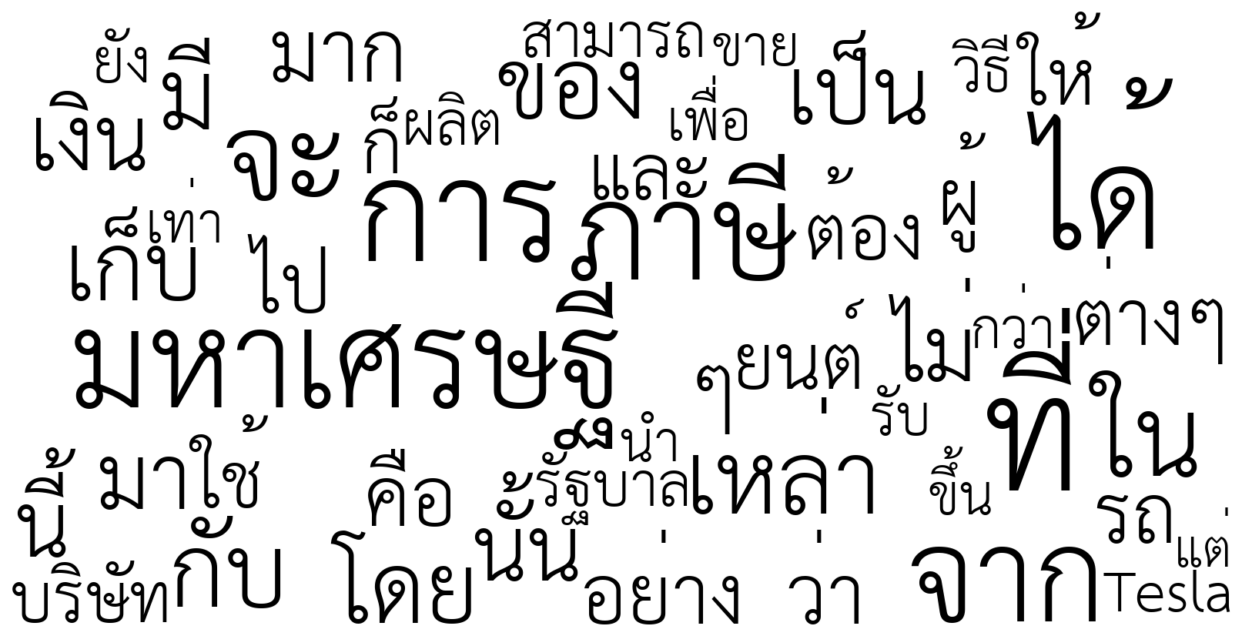

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width = 1600,
    height = 800,
    max_font_size = 300,
    prefer_horizontal = 1,
    background_color = 'white',
    color_func = lambda *args, **kwargs: "black",
    random_state=44,
    font_path='data/THSarabunNew.ttf'
)

filtered_counts = dict(c.most_common(50))

swc = wordcloud.generate_from_frequencies(filtered_counts)
plt.figure(figsize=(16, 8))
plt.imshow(swc, interpolation='bilinear')
plt.axis('off')
plt.show()